<a href="https://colab.research.google.com/github/truonganhtuan2002/Colab/blob/main/Ex_0508.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from wordcloud import WordCloud
import numpy as np
import nltk
import re
import os
import matplotlib.pyplot as plt
from PIL import Image
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
f = open("/content/drive/My Drive/Colab/data.txt",'r',encoding='UTF8')
my_book = f.readlines()
f.close()

1.1

In [ ]:
import nltk

# Tải dữ liệu punkt để phân tách từ
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

n_min = 4
corpus = []
lemmatizer = WordNetLemmatizer()
for a_line in my_book:
    pre = re.sub(r'\W', ' ', a_line)
    pre = re.sub(r'\d+','', pre)
    pre = nltk.word_tokenize(pre)
    pre = [x for x in pre if len(x) > n_min]
    pre = [x.lower() for x in pre]
    pre = [x for x in pre if x not in stopwords.words('english')]
    pre = [lemmatizer.lemmatize(x) for x in pre]
    corpus += pre

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
len(corpus)

350

1.2

In [ ]:
a_long_sentence = ' '.join(corpus)

In [ ]:
wc = WordCloud(background_color='white', max_words=30)
wc.generate(a_long_sentence)

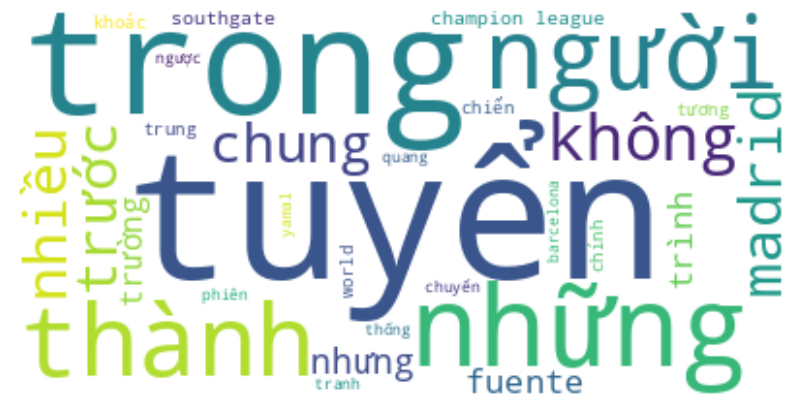

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

1.3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

img = Image.open('/content/drive/My Drive/Colab/nlp.png')
back_mask = np.array(img)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
wc = WordCloud(background_color='white', max_words=30, mask=back_mask)            # Customize the output.
wc.generate(a_long_sentence)

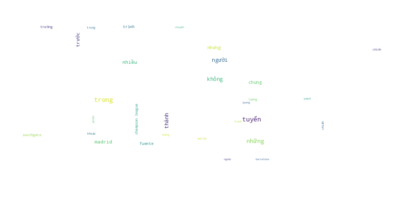

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig("out.png")
plt.show()